In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
# Input dataset (XOR-style)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected output (for example, 2 classes)
R = np.array([
    [0, 0],
    [1, 0],
    [1, 0],
    [0, 1]
])

In [5]:
# Network architecture: S2222
input_size = 2
hidden1_size = 2
hidden2_size = 2
output_size = 2

# Random initialization (with seed for repeatability)
np.random.seed(42)
W1 = np.random.randn(input_size, hidden1_size)
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size)
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size)
b3 = np.zeros((1, output_size))

In [6]:
# Learning settings
epochs = 1000
alpha = 0.5
errors = []

In [7]:
for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, W3) + b3
    output = sigmoid(z3)

    # Error calculation
    error = R - output
    total_error = np.sum(np.square(error)) / len(X)
    errors.append(total_error)

    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    d_W3 = np.dot(a2.T, d_output)
    d_b3 = np.sum(d_output, axis=0, keepdims=True)

    d_a2 = np.dot(d_output, W3.T)
    d_z2 = d_a2 * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights and biases
    W3 += alpha * d_W3
    b3 += alpha * d_b3
    W2 += alpha * d_W2
    b2 += alpha * d_b2
    W1 += alpha * d_W1
    b1 += alpha * d_b1

    # Print intermediate values every 100 epochs
    if epoch % 100 == 0:
        print(f"\nEpoch {epoch}")
        print("Output:\n", output)
        print("Error:\n", error)
        print("W1:\n", W1)
        print("W2:\n", W2)
        print("W3:\n", W3)


Epoch 0
Output:
 [[0.36048859 0.52385278]
 [0.34483379 0.53097606]
 [0.36397925 0.52288092]
 [0.34696831 0.53063918]]
Error:
 [[-0.36048859 -0.52385278]
 [ 0.65516621 -0.53097606]
 [ 0.63602075 -0.52288092]
 [-0.34696831  0.46936082]]
W1:
 [[ 0.49733504 -0.14261731]
 [ 0.6481019   1.5220622 ]]
W2:
 [[-0.24723345 -0.23078303]
 [ 1.56690106  0.77070821]]
W3:
 [[-0.4228999   0.45091225]
 [-0.42447606 -0.54406335]]

Epoch 100
Output:
 [[0.50234422 0.25460073]
 [0.49321895 0.25738457]
 [0.50634165 0.25575781]
 [0.49579925 0.25861777]]
Error:
 [[-0.50234422 -0.25460073]
 [ 0.50678105 -0.25738457]
 [ 0.49365835 -0.25575781]
 [-0.49579925  0.74138223]]
W1:
 [[ 0.54442501 -0.26964963]
 [ 0.68952051  1.49801433]]
W2:
 [[-0.2547448  -0.40499907]
 [ 1.59950061  0.57488001]]
W3:
 [[-0.2873084   0.38411151]
 [-0.28336103 -0.8210986 ]]

Epoch 200
Output:
 [[0.50162794 0.2517704 ]
 [0.4919743  0.26759288]
 [0.50756387 0.25236013]
 [0.49572491 0.26922913]]
Error:
 [[-0.50162794 -0.2517704 ]
 [ 0.50802

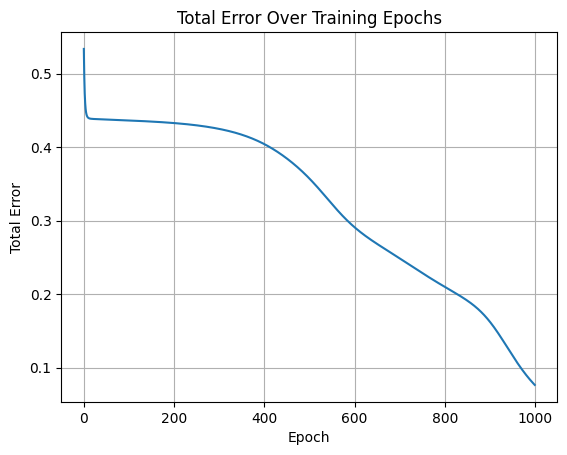

In [8]:
plt.plot(errors)
plt.title("Total Error Over Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()

In [9]:
print("Final Output After Training:")
print(np.round(output, 3))  # Rounded for readability

Final Output After Training:
[[0.299 0.003]
 [0.717 0.105]
 [0.745 0.108]
 [0.198 0.907]]
